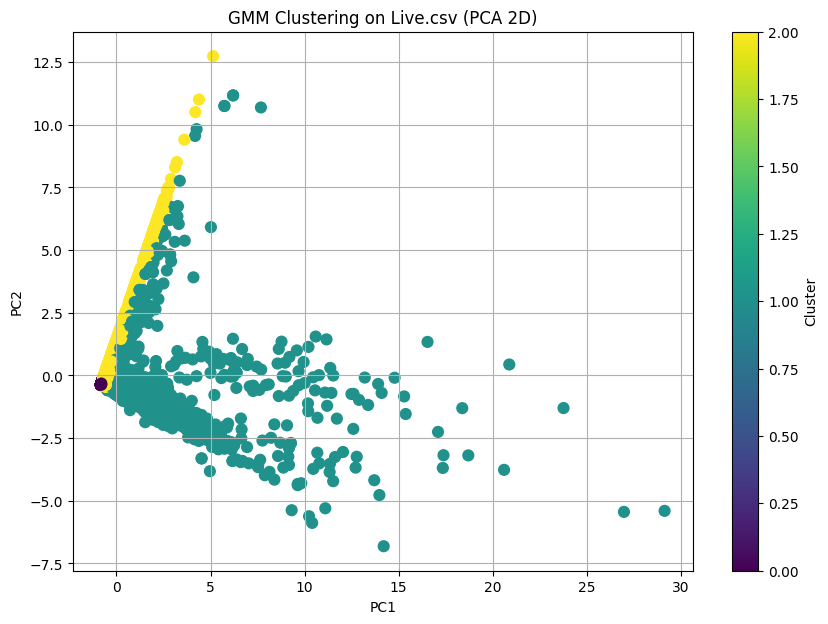

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# 1. 데이터 불러오기
df = pd.read_csv('./Live.csv')

# 2. 결측치 처리
# 2-1. 결측치 비율 50% 이상인 컬럼 제거
df = df.loc[:, df.isnull().mean() < 0.5]

# 2-2. 숫자형 컬럼만 선택 후, 결측치는 평균으로 대체
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.fillna(df_num.mean(numeric_only=True))

# 2-3. 불필요한 ID 컬럼이 있다면 제거
if 'status_id' in df_num.columns:
    df_num = df_num.drop(columns=['status_id'])

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 4. PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. GMM 군집화
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# 6. 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=60)
plt.title('GMM Clustering on Live.csv (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


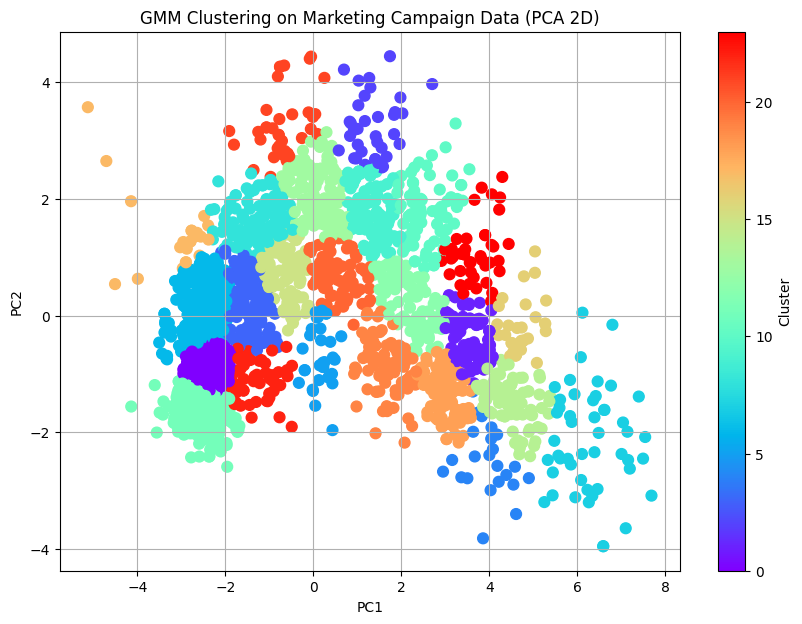

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# 1. 데이터 불러오기
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

# 2. 전처리
# 2-1. 결측치 제거
df = df.dropna()

# 2-2. 날짜형 변환 (dayfirst=True로 지정)
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 2-3. 숫자형 데이터만 추출
df_num = df.select_dtypes(include=['float64', 'int64'])

# 2-4. ID 컬럼 제거 (있다면)
if 'ID' in df_num.columns:
    df_num = df_num.drop(columns=['ID'])

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 4. PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. GMM 군집화
gmm = GaussianMixture(n_components=24, random_state=42)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# 6. 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow', s=60)
plt.title('GMM Clustering on Marketing Campaign Data (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


📌 MAE: 7954.66
📌 RMSE: 14646.28


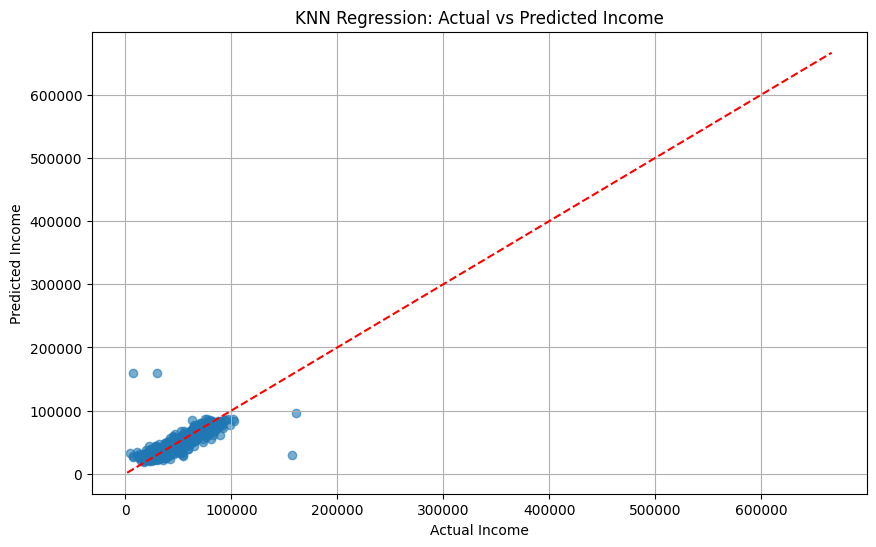

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

# 2. 전처리
df = df.dropna(subset=['Income'])  # Income 결측치 제거

# 날짜 처리 (선택)
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 숫자형 변수만 선택
df_num = df.select_dtypes(include=['float64', 'int64'])

# ID 제거
if 'ID' in df_num.columns:
    df_num = df_num.drop(columns=['ID'])

# 3. 특징(X), 타겟(y) 분리
X = df_num.drop(columns=['Income'])
y = df_num['Income']

# 4. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 7. 예측
y_pred = knn.predict(X_test_scaled)

# 8. 성능 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📌 MAE: {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")

# 9. 예측 vs 실제 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('KNN Regression: Actual vs Predicted Income')
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# 2. 파생 변수 생성
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Age'] = 2025 - df['Year_Birth']
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 3. 필요한 열만 사용하고 결측치 제거
df_model = df[['Age', 'SpendingTotal', 'Income']].dropna()

# 4. 입력 X / 타겟 y
X = df_model[['Age', 'SpendingTotal']]
y = df_model['Income']

# 5. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. 사용자 입력 받기
age = float(input("나이를 입력하세요 (예: 45): "))
spending = float(input("총 지출액을 입력하세요 (예: 1000): "))

# 9. 예측
user_input = np.array([[age, spending]])
user_scaled = scaler.transform(user_input)
predicted_income = knn.predict(user_scaled)

print(f"\n[예측 결과]")
print(f"예상 소득: {predicted_income[0]:,.0f} 달러")



[예측 결과]
예상 소득: 84,871 달러


c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# 2. 파생 변수 생성
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['ChildCount'] = df['Kidhome'] + df['Teenhome']

# 3. 필요한 열만 선택 후 결측치 제거
df_model = df[['SpendingTotal', 'ChildCount']].dropna()

# 4. 독립변수/종속변수 설정
X = df_model[['SpendingTotal']]
y = df_model['ChildCount']

# 5. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. 예측
y_pred = knn.predict(X_test)

# 9. 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📌 MAE: {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")

# 11. 사용자 입력으로 자녀 수 예측
try:
    spending_input = float(input("총 소비 금액을 입력하세요 (예: 1000): "))
    spending_scaled = scaler.transform([[spending_input]])  # 입력값 정규화
    child_pred = knn.predict(spending_scaled)

    print("\n[예측 결과]")
    print(f"예상 자녀 수: {child_pred[0]:.2f}명")

except Exception as e:
    print("⚠️ 올바른 숫자를 입력해주세요.")
    print("에러:", e)

📌 MAE: 0.56
📌 RMSE: 0.75

[예측 결과]
예상 자녀 수: 0.00명


c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 모델 성능 평가:
- MAE: 227.63
- RMSE: 335.57
- R²: 0.72


C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
C:\Users\ljm16\AppData\Local\Temp\ipykernel_35240\3018567782.py:66: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout(

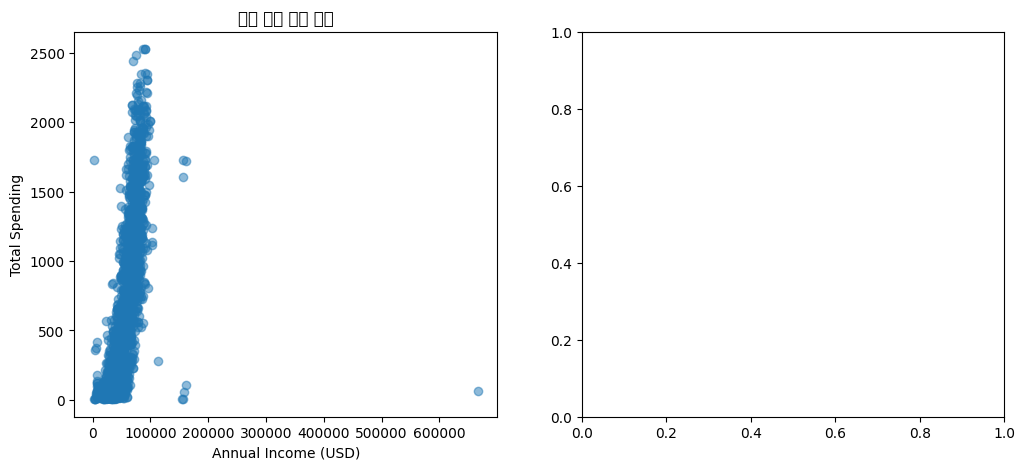

c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljm16\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:1

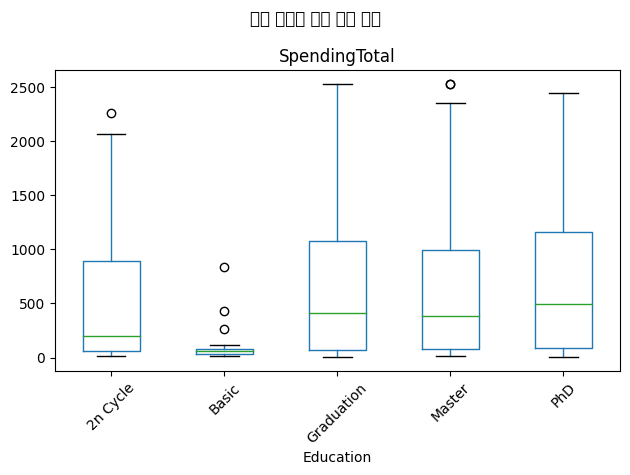


예상 총 소비 금액: $112.14


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# 파생 변수 생성
df['SpendingTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 2. 가설 설정: "소득과 교육 수준이 총 소비 금액을 결정한다"
df_model = df[['Income', 'Education', 'SpendingTotal']].dropna()

# 3. 데이터 분할
X = df_model[['Income', 'Education']]  # 독립변수: 소득 + 교육 수준
y = df_model['SpendingTotal']          # 종속변수: 총 소비 금액

# 4. 전처리 파이프라인 (범주형 변수 처리)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Income']),  # 수치형: 스케일링
        ('cat', OneHotEncoder(), ['Education']) # 범주형: 원핫인코딩
    ])

X_processed = preprocessor.fit_transform(X)

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# 6. 모델 학습
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = knn.predict(X_test)

print(" 모델 성능 평가:")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"- R²: {r2_score(y_test, y_pred):.2f}")

# 8. 시각화
plt.figure(figsize=(12, 5))

# 소득-소비 관계
plt.subplot(1, 2, 1)
plt.scatter(df_model['Income'], df_model['SpendingTotal'], alpha=0.5)
plt.xlabel('Annual Income (USD)')
plt.ylabel('Total Spending')
plt.title('소득 대비 소비 패턴')

# 교육 수준별 소비 분포
plt.subplot(1, 2, 2)
df_model.boxplot(column='SpendingTotal', by='Education', grid=False)
plt.xticks(rotation=45)
plt.suptitle('교육 수준별 소비 금액 분포')
plt.tight_layout()
plt.show()

# 9. 사용자 예측 인터페이스
try:
    income = float(input("연간 소득을 입력하세요 (USD): "))
    education = input("교육 수준을 입력하세요 (Graduation/PhD/Master/Basic/2n Cycle): ")
    
    user_data = pd.DataFrame([[income, education]], 
                            columns=['Income', 'Education'])
    processed_data = preprocessor.transform(user_data)
    
    prediction = knn.predict(processed_data)
    print(f"\n예상 총 소비 금액: ${prediction[0]:.2f}")
    
except Exception as e:
    print(f"⚠️ 오류 발생: {str(e)}")